In [1]:
import os

import pandas as pd

In [2]:
# 加载数据
train = pd.read_csv('./train_10000.csv')

# 绘图代码，可随时调用，用于查看数据预处理效果

In [5]:
# 将训练集的所有数据绘制散点图，存储在train
import matplotlib.pyplot as plt

for feature in train.columns[1:-1]:
    train_label_0 = train.loc[train['label'] == 0]
    train_label_1 = train.loc[train['label'] == 1]
    train_label_2 = train.loc[train['label'] == 2]
    train_label_3 = train.loc[train['label'] == 3]
    train_label_4 = train.loc[train['label'] == 4]
    train_label_5 = train.loc[train['label'] == 5]
    plt.figure(figsize=(16, 9))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    size=2
    plt.scatter(train_label_0['sample_id'],train_label_0[feature],s=size,c='blue', facecolor='grey')
    plt.scatter(train_label_1['sample_id'],train_label_1[feature],s=size,c='black', facecolor='grey')
    plt.scatter(train_label_2['sample_id'],train_label_2[feature],s=size,c='green', facecolor='grey')
    plt.scatter(train_label_3['sample_id'],train_label_3[feature],s=size,c='red', facecolor='grey')
    plt.scatter(train_label_4['sample_id'],train_label_4[feature],s=size,c='orange', facecolor='grey')
    plt.scatter(train_label_5['sample_id'],train_label_5[feature],s=size,c='purple', facecolor='grey')
    # plt.savefig(f'train/{feature-1}.png')
    plt.savefig(f'after_remove/{feature}.png')
    plt.close()

In [24]:
# 将验证集的所有数据绘制散点图，存储在validation文件夹
valid_auth = pd.read_csv('validate_1000.csv')
import matplotlib.pyplot as plt
for feature in range(1,107):
    valid_label_0 = valid_auth.loc[valid_auth['label'] == 0]
    valid_label_1 = valid_auth.loc[valid_auth['label'] == 1]
    valid_label_2 = valid_auth.loc[valid_auth['label'] == 2]
    valid_label_3 = valid_auth.loc[valid_auth['label'] == 3]
    valid_label_4 = valid_auth.loc[valid_auth['label'] == 4]
    valid_label_5 = valid_auth.loc[valid_auth['label'] == 5]
    plt.figure(figsize=(16, 9))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    plt.scatter(valid_label_0['sample_id'],valid_label_0.iloc[:,[feature]],s=2,c='blue', facecolor='grey')
    plt.scatter(valid_label_1['sample_id'],valid_label_1.iloc[:,[feature]],s=2,c='black', facecolor='grey')
    plt.scatter(valid_label_2['sample_id'],valid_label_2.iloc[:,[feature]],s=2,c='green', facecolor='grey')
    plt.scatter(valid_label_3['sample_id'],valid_label_3.iloc[:,[feature]],s=2,c='red', facecolor='grey')
    plt.scatter(valid_label_4['sample_id'],valid_label_4.iloc[:,[feature]],s=2,c='orange', facecolor='grey')
    plt.scatter(valid_label_5['sample_id'],valid_label_5.iloc[:,[feature]],s=2,c='purple', facecolor='grey')
    # plt.scatter(valid_auth['sample_id'],valid_auth.iloc[:,[feature]],s=0.2,c='red')
    plt.savefig(f'validation/{feature-1}.png')
    plt.close()

In [14]:
# 将验证集的所有数据绘制散点图，存储在validation文件夹
test_2000 = pd.read_csv('test_2000_x.csv')
import matplotlib.pyplot as plt
for feature in range(1,107):
    plt.figure(figsize=(16, 9))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    plt.scatter(test_2000['sample_id'],test_2000.iloc[:,[feature]],s=2,c='blue')
    plt.savefig(f'test_2000/{feature-1}.png')
    plt.close()

# 使用四分位点判别法，对训练集的label==0和label==1的值进行降噪处理，然后采用KNN填充缺失值。

以下三种方法只能采用其中一种，第三种最好。千万不要三个代码都运行。

这是第一种四分位判别法，基于label==0和label==1来确定离群值的阈值，然后应用这些阈值

In [3]:
import pandas as pd
import numpy as np

# 计算整个数据集的四分位数
Q1 = train.iloc[:, 1:107].quantile(0.25)
Q3 = train.iloc[:, 1:107].quantile(0.75)
IQR = Q3 - Q1

# 需要处理的label
noisy_labels = [0, 1]

for label in noisy_labels:
    # 获取该label的数据
    df_label = train[train['label'] == label].copy()

    # 对每一列特征分别进行处理
    for col in df_label.columns[1:107]:
        # 将离群值设为NaN
        df_label.loc[(df_label[col] < Q1[col] - 1.5 * IQR[col]) | (df_label[col] > Q3[col] + 1.5 * IQR[col]), col] = np.nan

    # 更新原始数据
    train.loc[train['label'] == label] = df_label

# 你可以选择用KNN imputer或其他方法处理NaN值，或者直接删除含有NaN的行
# df.dropna(inplace=True)
train

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,label
0,0,51.567250,288358.4,NaN,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,...,31459.628135,254.582034,0.0,-2.014506e+08,159.299350,0.603211,NaN,-5.256075,180.977310,4
1,1,63.804874,288358.4,1.106802,1.050387,391.605375,13.323439,4.662871,NaN,-1.442474e+05,...,42830.526855,270.580779,0.0,-1.534970e+09,NaN,0.506220,0.552654,16.505952,314.783263,5
2,2,49.138527,288358.4,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,...,249963.241809,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610,2
3,3,NaN,288358.4,1.109169,NaN,258.521076,0.716737,23.238461,-3.539891e+11,NaN,...,125478.297201,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670,2
4,4,76.520831,288358.4,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,...,186266.423019,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,66.948837,288358.4,1.102805,NaN,260.805938,6.663322,-6.495112,-1.959797e+11,-1.169449e+06,...,131837.380427,207.050530,0.0,-5.375408e+08,NaN,1.598658,1.239977,-1.625234,NaN,0
9996,9996,NaN,288358.4,1.107632,0.679847,NaN,22.327405,2.251901,8.157356e+11,1.887989e+05,...,3416.075865,228.252191,0.0,4.302888e+08,NaN,2.348464,3.079268,11.018358,250.312228,0
9997,9997,42.208350,288358.4,1.110253,0.037611,180.875482,9.471924,6.725166,1.039534e+12,8.453963e+04,...,NaN,211.716051,0.0,-5.853507e+07,167.836714,3.840799,NaN,75.537477,241.702576,2
9998,9998,26.797447,288358.4,1.094471,0.505019,253.278224,19.199080,-4.451117,5.994078e+11,-3.025228e+05,...,101045.903091,225.324419,0.0,7.009934e+08,27.189454,0.538561,NaN,-10.481948,113.104089,0


这是第二种四分位判别法，基于整个数据集来确定离群值的阈值，然后在各自的label中（例如label==0和label==1）应用这些阈值。

In [63]:
import numpy as np

# 需要处理的label
noisy_labels = [0, 1]

for label in noisy_labels:
    # 获取该label的数据
    df_label = train[train['label'] == label].copy()

    # 对每一列特征分别进行处理
    for col in df_label.columns[1:107]:
        Q1 = df_label[col].quantile(0.25)
        Q3 = df_label[col].quantile(0.75)
        IQR = Q3 - Q1

        # 将离群值设为NaN
        df_label.loc[(df_label[col] < Q1 - 1.5 * IQR) | (df_label[col] > Q3 + 1.5 * IQR), col] = np.nan

    # 更新原始数据
    train.loc[train['label'] == label] = df_label
train

这是再改进的四分位点判别法，考虑到feature2的特殊性，进行了特殊处理

In [4]:
import numpy as np

# 需要处理的label
noisy_labels = [0, 1]

for label in noisy_labels:
    # 获取该label的数据
    df_label = train[train['label'] == label].copy()

    # 对每一列特征分别进行处理
    for col in df_label.columns[1:107]:
        if col == 3:
            Q1 = train.iloc[:, 1:107].quantile(0.25)
            Q3 = train.iloc[:, 1:107].quantile(0.75)
            IQR = Q3 - Q1
        else:
            Q1 = df_label[col].quantile(0.25)
            Q3 = df_label[col].quantile(0.75)
            IQR = Q3 - Q1

        # 将离群值设为NaN
        df_label.loc[(df_label[col] < Q1 - 1.5 * IQR) | (df_label[col] > Q3 + 1.5 * IQR), col] = np.nan

    # 更新原始数据
    train.loc[train['label'] == label] = df_label
train

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,label
0,0,51.567250,288358.4,NaN,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,...,31459.628135,254.582034,0.0,-2.014506e+08,159.299350,0.603211,NaN,-5.256075,180.977310,4
1,1,63.804874,288358.4,1.106802,1.050387,391.605375,13.323439,4.662871,NaN,-1.442474e+05,...,42830.526855,270.580779,0.0,-1.534970e+09,NaN,0.506220,0.552654,16.505952,314.783263,5
2,2,49.138527,288358.4,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,...,249963.241809,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610,2
3,3,NaN,288358.4,1.109169,NaN,258.521076,0.716737,23.238461,-3.539891e+11,NaN,...,125478.297201,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670,2
4,4,76.520831,288358.4,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,...,186266.423019,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,66.948837,288358.4,1.102805,NaN,260.805938,6.663322,-6.495112,-1.959797e+11,-1.169449e+06,...,131837.380427,207.050530,0.0,-5.375408e+08,NaN,1.598658,1.239977,-1.625234,NaN,0
9996,9996,NaN,288358.4,1.107632,0.679847,NaN,22.327405,2.251901,8.157356e+11,1.887989e+05,...,3416.075865,228.252191,0.0,4.302888e+08,NaN,2.348464,3.079268,11.018358,250.312228,0
9997,9997,42.208350,288358.4,1.110253,0.037611,180.875482,9.471924,6.725166,1.039534e+12,8.453963e+04,...,NaN,211.716051,0.0,-5.853507e+07,167.836714,3.840799,NaN,75.537477,241.702576,2
9998,9998,26.797447,288358.4,1.094471,0.505019,253.278224,19.199080,-4.451117,5.994078e+11,-3.025228e+05,...,101045.903091,225.324419,0.0,7.009934e+08,27.189454,0.538561,NaN,-10.481948,113.104089,0


## KNN插值算法

In [6]:
from sklearn.impute import KNNImputer

# 获取所有的label
labels = train['label'].unique()

# 对于每一个label，分别进行插值
for label in labels:
    # 获取该label的数据
    df_label = train[train['label'] == label]

    # 取出feature列
    features = df_label.iloc[:,1:107]

    # 创建KNN imputer
    imputer = KNNImputer(n_neighbors=5)

    # 对feature进行插值
    features_imputed = imputer.fit_transform(features)

    # 更新原始数据
    train.loc[train['label'] == label, train.columns[1:107]] = features_imputed

# 最后，train就是插值后的数据
train

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,label
0,0,51.567250,288358.4,1.106507,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,...,31459.628135,254.582034,0.0,-2.014506e+08,159.299350,0.603211,0.387657,-5.256075,180.977310,4
1,1,63.804874,288358.4,1.106802,1.050387,391.605375,13.323439,4.662871,1.089855e+11,-1.442474e+05,...,42830.526855,270.580779,0.0,-1.534970e+09,163.755351,0.506220,0.552654,16.505952,314.783263,5
2,2,49.138527,288358.4,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,...,249963.241809,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610,2
3,3,64.411529,288358.4,1.109169,2.580881,258.521076,0.716737,23.238461,-3.539891e+11,6.907655e+05,...,125478.297201,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670,2
4,4,76.520831,288358.4,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,...,186266.423019,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,66.948837,288358.4,1.102805,-0.310484,260.805938,6.663322,-6.495112,-1.959797e+11,-1.169449e+06,...,131837.380427,207.050530,0.0,-5.375408e+08,148.080110,1.598658,1.239977,-1.625234,NaN,0
9996,9996,41.137296,288358.4,1.107632,0.679847,160.449641,22.327405,2.251901,8.157356e+11,1.887989e+05,...,3416.075865,228.252191,0.0,4.302888e+08,131.923443,2.348464,3.079268,11.018358,250.312228,0
9997,9997,42.208350,288358.4,1.110253,0.037611,180.875482,9.471924,6.725166,1.039534e+12,8.453963e+04,...,149650.953476,211.716051,0.0,-5.853507e+07,167.836714,3.840799,0.834373,75.537477,241.702576,2
9998,9998,26.797447,288358.4,1.094471,0.505019,253.278224,19.199080,-4.451117,5.994078e+11,-3.025228e+05,...,101045.903091,225.324419,0.0,7.009934e+08,27.189454,0.538561,2.199572,-10.481948,113.104089,0


# 对这些特征进行Anova方差分析，去除无效特征

In [7]:
from scipy.stats import f_oneway

# 获取所有的label
labels = train['label'].unique()

# 存储需要移除的特征
to_remove = []

# 遍历所有特征列
for col in train.columns[1:107]:
    # 存储每个label下该特征的值
    groups = []

    for label in labels:
        # 获取该label下该特征的值
        group = train.loc[train['label'] == label, col]
        groups.append(group)

    # 使用ANOVA进行方差分析
    f_val, p_val = f_oneway(*groups)

    # 如果p_val大于0.05（即无显著差异），那么添加到待移除列表中
    if p_val > 0.01:
        print(col)
        to_remove.append(col)

# 移除那些对于不同label，其分布无显著差异的特征
train.drop(columns=to_remove, inplace=True)
# to_remove
train

feature7
feature8
feature16
feature26
feature36
feature40
feature42
feature43
feature61
feature66
feature69
feature72
feature79
feature82
feature90
feature94
feature101


D:\ProgramData\anaconda3\envs\spyder-cf\lib\site-packages\scipy\stats\_stats_py.py:3906: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature9,feature10,...,feature97,feature98,feature99,feature100,feature102,feature103,feature104,feature105,feature106,label
0,0,51.567250,288358.4,1.106507,1.855900,201.460169,6.582261,-0.516321,2.002797e+14,0.638620,...,-14.701891,31459.628135,254.582034,0.0,159.299350,0.603211,0.387657,-5.256075,180.977310,4
1,1,63.804874,288358.4,1.106802,1.050387,391.605375,13.323439,4.662871,2.601894e+15,1.086145,...,-8.959940,42830.526855,270.580779,0.0,163.755351,0.506220,0.552654,16.505952,314.783263,5
2,2,49.138527,288358.4,1.111649,0.767127,130.708067,6.485547,5.696815,1.363373e+14,1.081780,...,32.159667,249963.241809,160.207067,0.0,112.632639,0.080100,0.235920,64.707581,183.304610,2
3,3,64.411529,288358.4,1.109169,2.580881,258.521076,0.716737,23.238461,-1.338632e+15,1.065701,...,1.815809,125478.297201,196.223295,0.0,138.431470,2.548783,1.414810,-9.662399,212.302670,2
4,4,76.520831,288358.4,1.113410,5.795408,256.038997,-1.803483,14.040495,2.800250e+15,1.071177,...,40.623904,186266.423019,179.083883,0.0,259.858740,0.337643,0.228832,59.733069,135.541233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,66.948837,288358.4,1.102805,-0.310484,260.805938,6.663322,-6.495112,-7.013034e+15,1.067742,...,-2.835490,131837.380427,207.050530,0.0,148.080110,1.598658,1.239977,-1.625234,NaN,0
9996,9996,41.137296,288358.4,1.107632,0.679847,160.449641,22.327405,2.251901,-2.570942e+15,1.083514,...,-7.159508,3416.075865,228.252191,0.0,131.923443,2.348464,3.079268,11.018358,250.312228,0
9997,9997,42.208350,288358.4,1.110253,0.037611,180.875482,9.471924,6.725166,-1.985673e+15,1.056892,...,49.752609,149650.953476,211.716051,0.0,167.836714,3.840799,0.834373,75.537477,241.702576,2
9998,9998,26.797447,288358.4,1.094471,0.505019,253.278224,19.199080,-4.451117,-3.013453e+15,1.051152,...,17.797175,101045.903091,225.324419,0.0,27.189454,0.538561,2.199572,-10.481948,113.104089,0


# 通过梯度提升分类器，计算各特征的重要性

In [8]:
import seaborn as sns
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.inspection import permutation_importance

# 获取特征和标签
X = train.iloc[:, 1:-1]  # 取feature0到feature106作为特征
y = train['label']  # 取'label'列作为标签

all_importances = pd.DataFrame(index=X.columns)

# 使用分层K折交叉验证
skf = StratifiedKFold(n_splits=5)

for fault_type in range(6):
    # 对于每个故障类型，我们将该类型标记为1，其他类型标记为0
    y_binary = (y == fault_type).astype(int)

    feature_importances = []

    for train_index, test_index in skf.split(X, y_binary):
        # 训练梯度提升分类器
        clf = HistGradientBoostingClassifier(max_iter=100, random_state=0, max_depth=5, min_samples_leaf=10)
        clf.fit(X.iloc[train_index], y_binary.iloc[train_index])

        # 获取并存储特征重要性
        result = permutation_importance(clf, X.iloc[test_index], y_binary.iloc[test_index], n_repeats=10, random_state=0)
        feature_importances.append(result.importances_mean)

    # 通过所有交叉验证的平均值获取特征重要性
    feature_importances_mean = np.mean(feature_importances, axis=0)
    all_importances[f'FaultType {fault_type}'] = feature_importances_mean

all_importances

,FaultType 0,FaultType 1,FaultType 2,FaultType 3,FaultType 4,FaultType 5
feature0,0.00028,0.00018,0.00051,0.00000,0.0,0.00000
feature1,0.00000,0.00000,0.00000,0.00000,0.0,0.00000
feature2,0.00450,0.01926,0.00653,0.00000,0.0,0.00000
feature3,0.00041,-0.00007,0.00083,0.00000,0.0,0.00000
feature4,0.00011,0.00038,0.00043,0.00000,0.0,0.00000
...,...,...,...,...,...,...
feature102,0.00034,0.00010,0.00017,0.00000,0.0,0.00007
feature103,0.00147,0.00049,0.00188,-0.00008,0.0,0.00000
feature104,0.00003,0.00073,0.00243,0.00000,0.0,0.00000
feature105,0.00150,-0.00002,0.00150,0.00000,0.0,0.00000


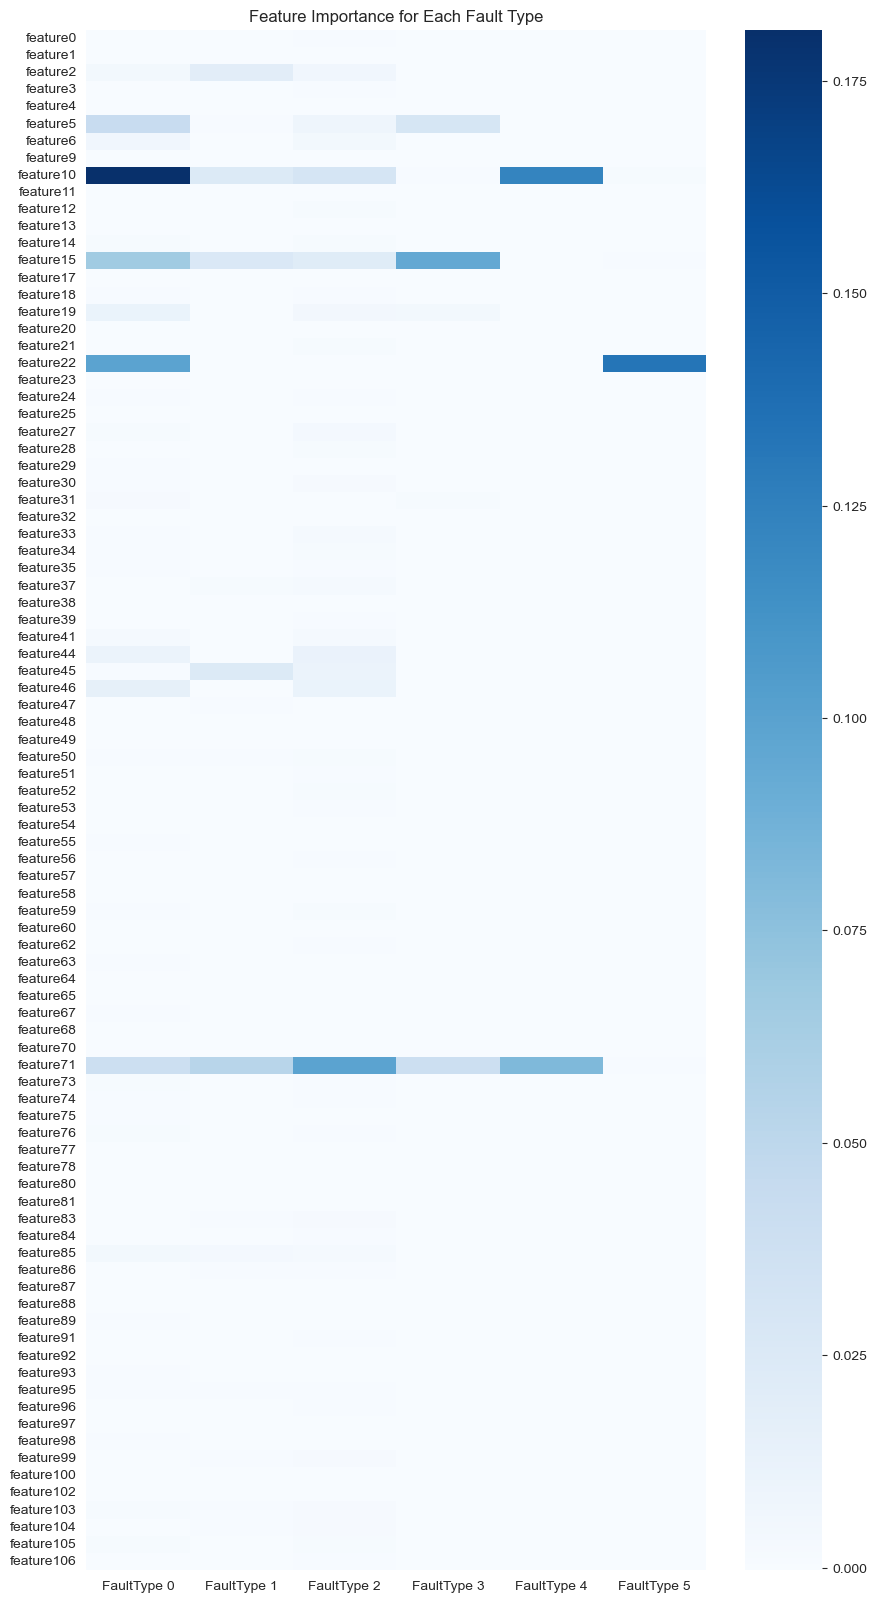

In [9]:
import matplotlib.pyplot as plt
# 创建热力图
plt.figure(figsize=(10, 20))
sns.heatmap(all_importances, cmap='Blues')
plt.title('Feature Importance for Each Fault Type')
plt.show()

In [10]:
# 为每个故障类型选择前6个最重要的特征
important_features_per_fault = {}
for fault_type in all_importances.columns:
    top_6_features = all_importances[fault_type].sort_values(ascending=False)[:6]
    important_features_per_fault[fault_type] = list(top_6_features.index)


# 打印结果
for fault_type, features in important_features_per_fault.items():
    print(f"For {fault_type}, the most important features are {features}")

# 合并所有的重要特征到一个集合
selected_features = set()

for features in important_features_per_fault.values():
    selected_features.update(features)

print("最终选择的特征有：",selected_features)

For FaultType 0, the most important features are ['feature10', 'feature22', 'feature15', 'feature5', 'feature71', 'feature46']
For FaultType 1, the most important features are ['feature71', 'feature15', 'feature45', 'feature10', 'feature2', 'feature85']
For FaultType 2, the most important features are ['feature71', 'feature10', 'feature15', 'feature44', 'feature46', 'feature45']
For FaultType 3, the most important features are ['feature15', 'feature71', 'feature5', 'feature19', 'feature31', 'feature10']
For FaultType 4, the most important features are ['feature10', 'feature71', 'feature0', 'feature67', 'feature78', 'feature77']
For FaultType 5, the most important features are ['feature22', 'feature10', 'feature15', 'feature71', 'feature74', 'feature18']
最终选择的特征有： {'feature74', 'feature2', 'feature31', 'feature15', 'feature22', 'feature18', 'feature77', 'feature0', 'feature46', 'feature71', 'feature45', 'feature85', 'feature19', 'feature5', 'feature67', 'feature78', 'feature44', 'featur

# 训练模型

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

df_train = train

# 选择重要的特征
X_train = df_train[selected_features].values
y_train = df_train['label'].values

# 标准化数据
scaler = StandardScaler()
x_training_data_final = scaler.fit_transform(X_train)

mlp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, hidden_layer_sizes=(64,64,64), random_state=42,max_iter=300,verbose=True,learning_rate_init=0.05,learning_rate="adaptive")
mlp.fit(x_training_data_final, y_train)
print("finished")

Iteration 1, loss = 0.74304318
Iteration 2, loss = 0.25624227
Iteration 3, loss = 0.22556003


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\3036342498.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = df_train[selected_features].values


Iteration 4, loss = 0.20938295
Iteration 5, loss = 0.19666486
Iteration 6, loss = 0.18787733
Iteration 7, loss = 0.18155772
Iteration 8, loss = 0.17648694
Iteration 9, loss = 0.17308969
Iteration 10, loss = 0.16597769
Iteration 11, loss = 0.16117388
Iteration 12, loss = 0.15864109
Iteration 13, loss = 0.15578425
Iteration 14, loss = 0.15208879
Iteration 15, loss = 0.15092212
Iteration 16, loss = 0.14386958
Iteration 17, loss = 0.14114378
Iteration 18, loss = 0.13830479
Iteration 19, loss = 0.13254815
Iteration 20, loss = 0.13146652
Iteration 21, loss = 0.13125626
Iteration 22, loss = 0.12371129
Iteration 23, loss = 0.12461231
Iteration 24, loss = 0.12391964
Iteration 25, loss = 0.11920528
Iteration 26, loss = 0.12099713
Iteration 27, loss = 0.11151930
Iteration 28, loss = 0.10851273
Iteration 29, loss = 0.10342023
Iteration 30, loss = 0.10661024
Iteration 31, loss = 0.10389541
Iteration 32, loss = 0.10108794
Iteration 33, loss = 0.09358963
Iteration 34, loss = 0.09427401
Iteration 35, 

# 使用导入的验证集，用和训练集一样的思路进行预处理后跑分

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
df_val = pd.read_csv('validate_1000.csv')

# 对label2降噪
noisy_labels = [2] # 需要处理的label

for label in noisy_labels:
    # 获取该label的数据
    df_label = df_val[df_val['label'] == label].copy()

    # 对每一列特征分别进行处理
    for col in df_label.columns[1:107]:
        Q1 = df_label[col].quantile(0.25)
        Q3 = df_label[col].quantile(0.75)
        IQR = Q3 - Q1

        # 将离群值设为NaN
        df_label.loc[(df_label[col] < Q1 - 1.5 * IQR) | (df_label[col] > Q3 + 1.5 * IQR), col] = np.nan

    # 更新原始数据
    df_val.loc[df_val['label'] == label] = df_label

# KNN插值
# 获取所有的label
labels = df_val['label'].unique()

# 对于每一个label，分别进行插值
for label in labels:
    # 获取该label的数据
    df_label = df_val[df_val['label'] == label]

    # 取出feature列
    features = df_label.iloc[:,1:107]

    # 创建KNN imputer
    imputer = KNNImputer(n_neighbors=5)

    # 对feature进行插值
    features_imputed = imputer.fit_transform(features)

    # 更新原始数据
    df_val.loc[df_val['label'] == label, df_val.columns[1:107]] = features_imputed

# 最后，df_val就是插值后的数据
df_val

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,label
0,0,0.028405,275251.2,1.055338,0.222780,151.663616,4.791735,-0.606762,-4.635572e+11,-9993.065615,...,188.215811,63383.465093,0.0,-5.402172e+08,226.024537,252.694155,173.283835,4.398378,1.072018,4
1,1,0.143195,275251.2,1.055559,1.318457,197.142222,3.312857,-0.595553,1.691514e+11,-17048.791451,...,286.085843,61252.178113,0.0,4.148875e+07,226.540356,368.144352,147.549959,4.860445,3.372656,2
2,2,2.073869,275251.2,1.056402,0.439491,414.603088,11.562821,-0.307624,-4.787776e+11,-6253.106686,...,282.209008,84610.789519,0.0,-1.283888e+08,148.315344,450.207148,252.212503,-0.199616,0.579550,0
3,3,3.800129,275251.2,1.048823,0.226532,107.200300,5.195275,0.467004,8.013146e+10,18534.202164,...,332.726788,42374.228412,0.0,-7.077652e+08,196.318521,554.252521,239.749990,2.317003,0.804335,3
4,4,1.655328,275251.2,1.058387,1.833527,223.741794,7.058261,0.169602,-2.785935e+11,22427.342896,...,363.088734,53224.385071,0.0,1.644601e+09,178.784403,166.686493,188.897187,1.623905,0.383373,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3.490393,275251.2,1.054298,0.388134,192.042071,2.184411,0.541902,7.557441e+10,-12117.557672,...,404.239474,111487.595916,0.0,1.416957e+09,318.628748,559.518611,108.544360,8.362619,0.062067,2
996,996,0.094578,275251.2,1.065857,0.792958,239.756830,12.884280,0.590967,2.060554e+11,7359.353936,...,247.563171,13564.197592,0.0,1.063406e+09,240.074048,400.133738,197.492887,4.579563,1.730356,5
997,997,0.821441,275251.2,1.051351,1.473075,307.911292,7.144647,-0.065540,1.054757e+10,14605.005760,...,252.835799,63620.372427,0.0,7.048587e+08,239.928491,389.930676,132.379613,0.908485,0.160965,0
998,998,0.509190,275251.2,1.060215,0.467130,191.904547,3.804719,0.489046,-3.471685e+11,26925.979413,...,382.671144,121937.498933,0.0,-6.889364e+08,215.615401,622.796215,113.376968,5.770222,0.493801,4


In [13]:
# 在验证集上检查性能
from sklearn.metrics import accuracy_score, f1_score

# 转换 selected_features 为 list
selected_features = list(selected_features)

X_val = df_val[selected_features].values
y_val = df_val['label'].values

y_test_pre = mlp.predict(X_val)
print("f1_score: ", f1_score(y_val, y_test_pre, average='macro'))
print("accuracy_score: ", accuracy_score(y_val, y_test_pre))

f1_score:  0.04855755498429021
accuracy_score:  0.17


# 使用导入的验证集，单纯使用KNN插值后跑分

In [13]:
df_test = pd.read_csv('validate_1000.csv')

# 转换 selected_features 为 list
selected_features = list(selected_features)

X_test = df_test[selected_features].values
X_test = scaler.transform(X_test)
# KNN插值
# 取出feature列
features = df_test.iloc[:,1:-1]

# 创建KNN imputer
imputer = KNNImputer(n_neighbors=5)

# 对feature进行插值
features_imputed = imputer.fit_transform(features)

# 更新原始数据
df_test.loc[:, df_test.columns[1:-1]] = features_imputed

In [14]:
# 在验证集上检查性能
from sklearn.metrics import accuracy_score, f1_score

# 转换 selected_features 为 list
selected_features = list(selected_features)

X_val = df_test[selected_features].values
y_val = df_test['label'].values

y_test_pre = mlp.predict(X_val)
print("f1_score: ", f1_score(y_val, y_test_pre, average='macro'))
print("accuracy_score: ", accuracy_score(y_val, y_test_pre))

f1_score:  0.048515981735159815
accuracy_score:  0.17


# 使用导入的测试集，单纯使用KNN插值后计算

In [15]:
df_test = pd.read_csv('./test_2000_x.csv')
X_test = df_test[selected_features].values
X_test = scaler.transform(X_test)

# KNN插值
# 创建KNN imputer
imputer = KNNImputer(n_neighbors=5)

# 对feature进行插值
features_imputed = imputer.fit_transform(X_test)

# 更新原始数据
X_test = features_imputed

y_test_pre = mlp.predict(X_test)

In [16]:
y_test_pre

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [20]:
print('Count:')
y_test_pre = list(y_test_pre)
print(0,y_test_pre.count(0))
print(1,y_test_pre.count(1))
print(2,y_test_pre.count(2))
print(3,y_test_pre.count(3))
print(4,y_test_pre.count(4))
print(5,y_test_pre.count(5))

Count:
0 218
1 0
2 1337
3 237
4 208
5 0
